In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os

def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                total_images += 1
    return total_images

train_folder = "/content/drive/MyDrive/Internship2023/DentalDiseases/train/images"  # Replace with the path to your train folder
test_folder = "/content/drive/MyDrive/Internship2023/DentalDiseases/test/images"    # Replace with the path to your test folder
valid_folder = "/content/drive/MyDrive/Internship2023/DentalDiseases/valid/images"

train_count = count_images(train_folder)
test_count = count_images(test_folder)
valid_count = count_images(valid_folder)

print("Total images in the train folder:", train_count)
print("Total images in the test folder:", test_count)
print("Total images in the valid folder:", valid_count)

Total images in the train folder: 1438
Total images in the test folder: 61
Total images in the valid folder: 61


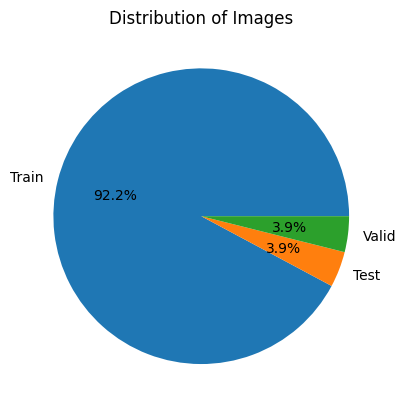

In [17]:
import matplotlib.pyplot as plt

# Create a list of counts and corresponding labels
counts = [train_count, test_count, valid_count]
labels = ['Train', 'Test', 'Valid']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Images')

# Display the pie chart
plt.show()

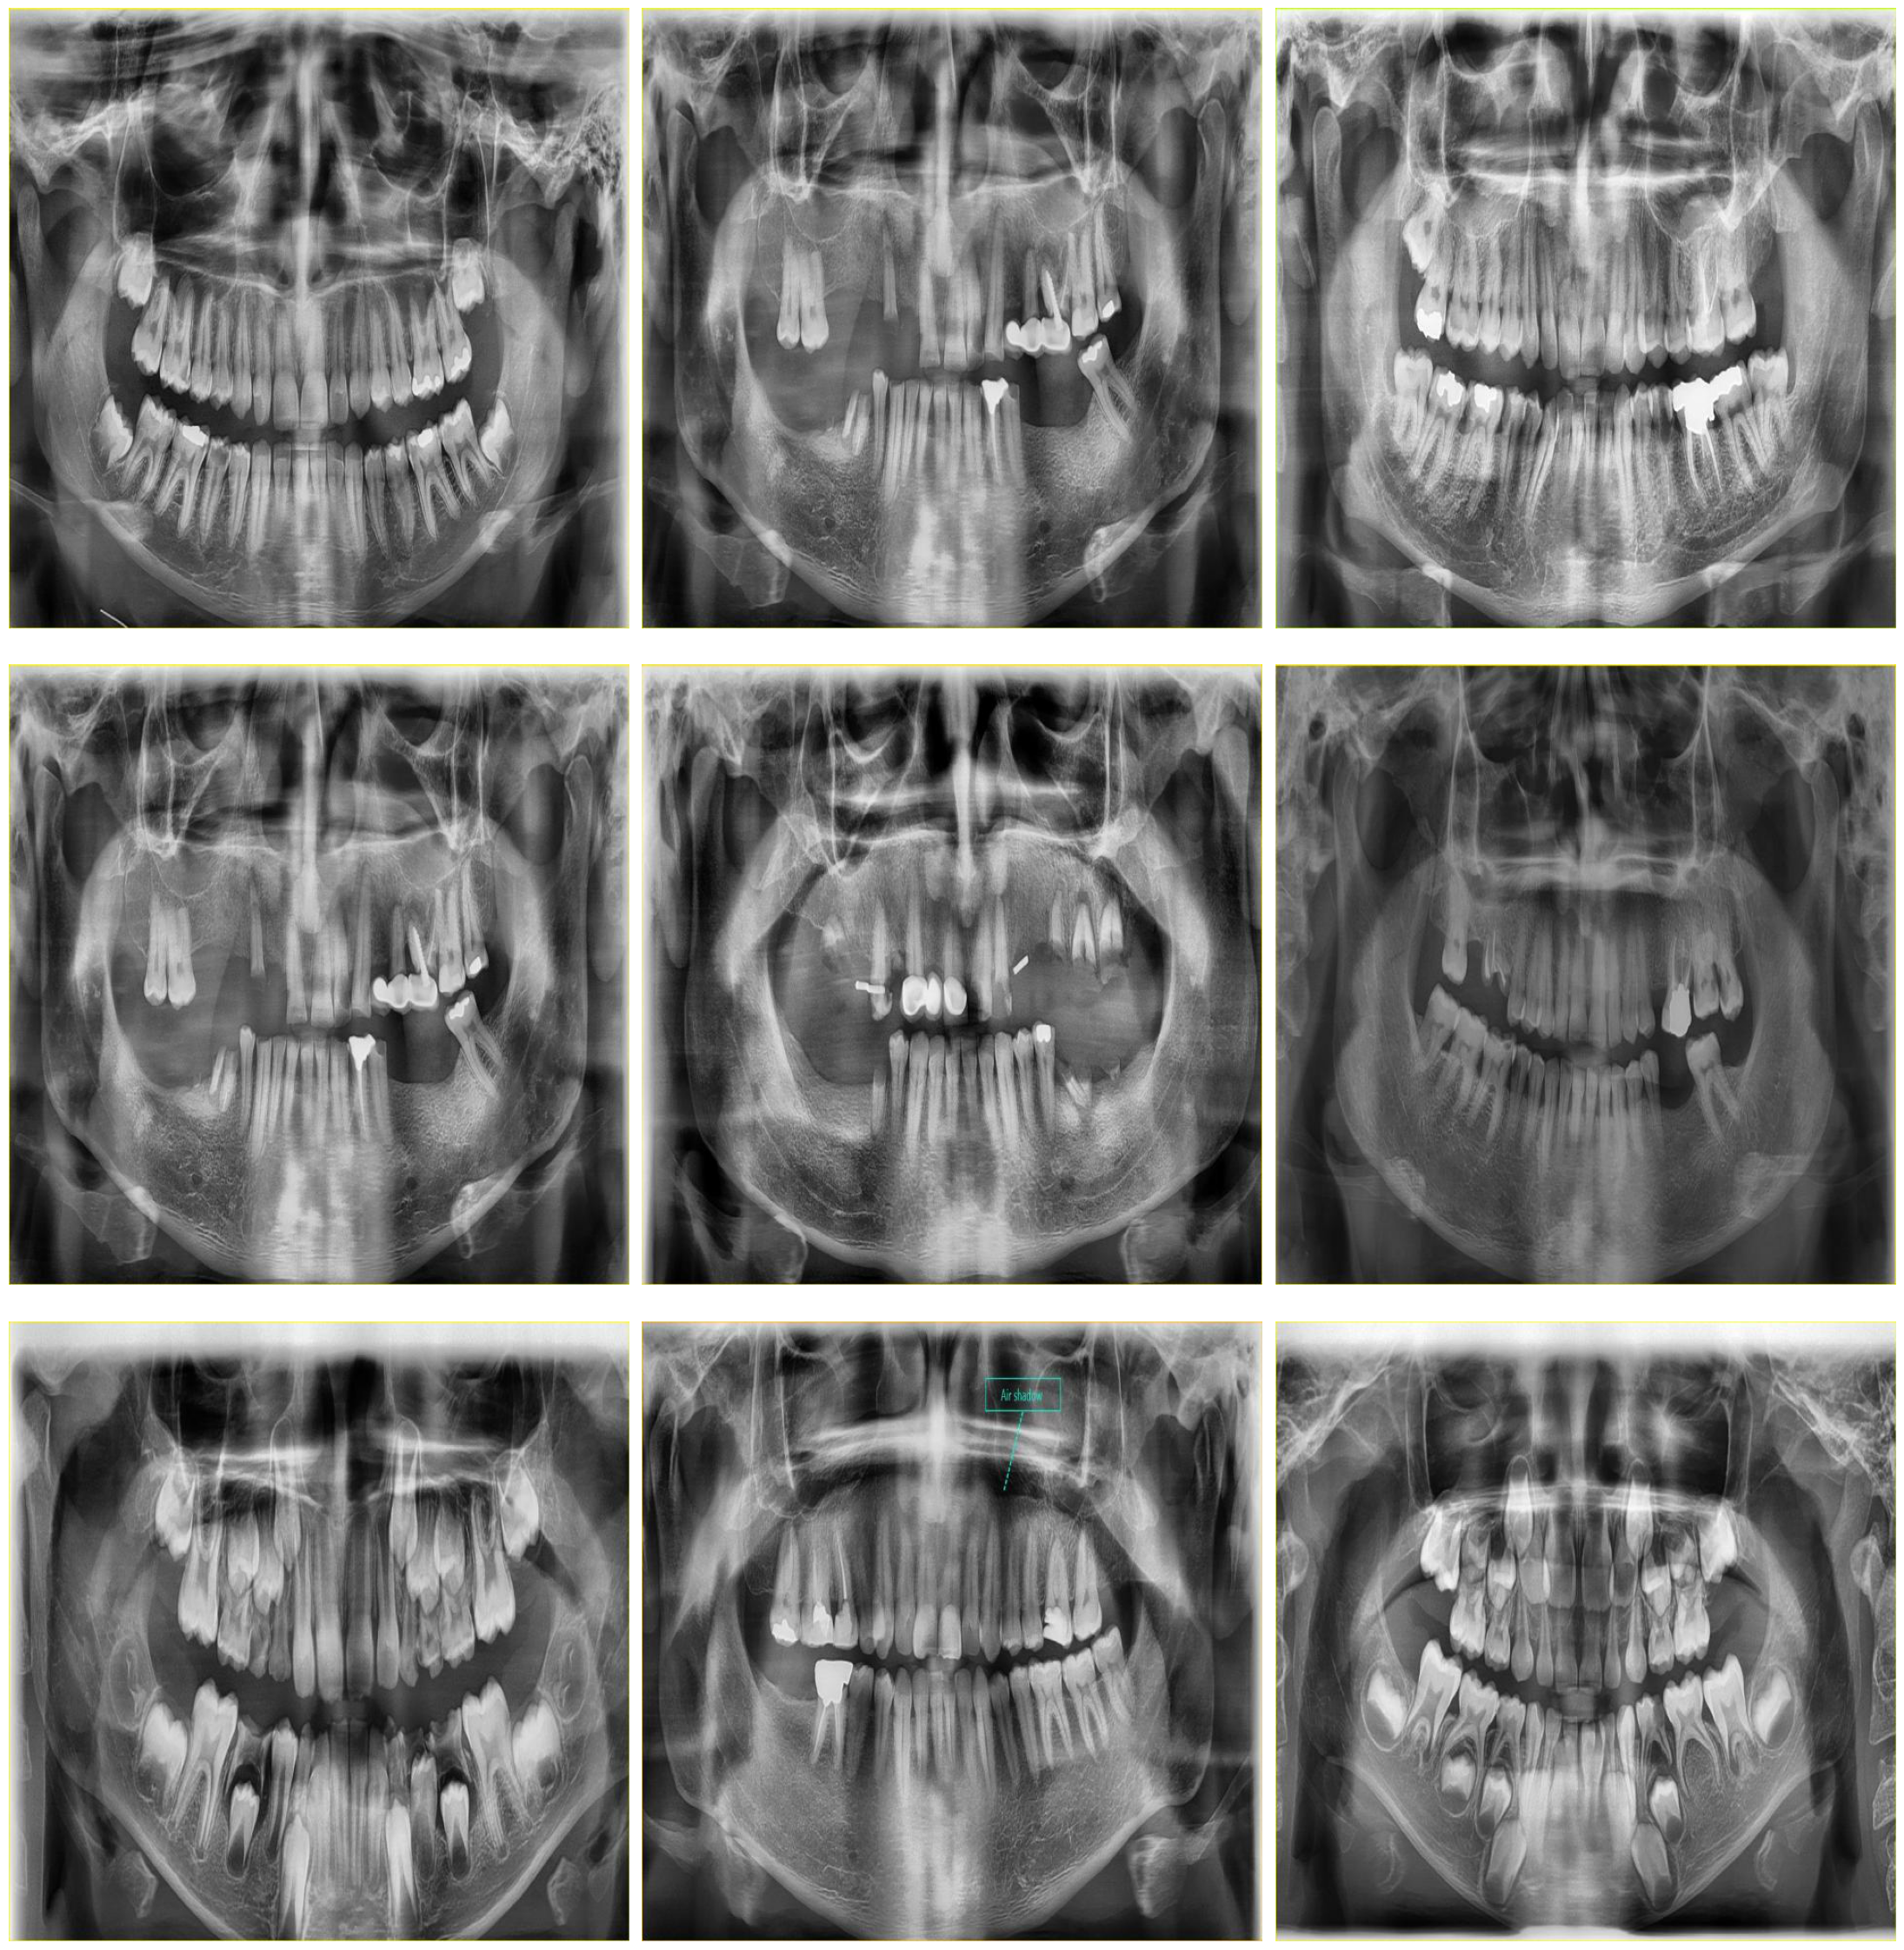

In [22]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the train folder
train_folder = "/content/drive/MyDrive/Internship2023/DentalDiseases/train/images"  # Replace with the path to your train folder

image_files = os.listdir(train_folder)[:10]

fig, axes = plt.subplots(3, 3, figsize=(22, 23))

# Loop through the image files and plot them in the collage
for i, ax in enumerate(axes.flat):
    # Open and display each image
    img = Image.open(os.path.join(train_folder, image_files[i]))
    ax.imshow(img)
    ax.axis('off')

# Adjust the layout
plt.tight_layout()

# Show the collage
plt.show()


In [3]:
# Train YOLOv5s on Dental Radiographs for 10 epochs
!python train.py --img 640 --batch 16 --epochs 10 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

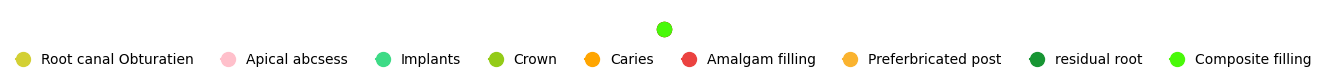

In [74]:
import matplotlib.pyplot as plt

# Define the colors and their corresponding labels
colors = ['#D3D034', 'pink', '#3ddb86', '#93cb17', 'orange','#EB4240','#FAB32F','#179533','#49f909']
labels = ['Root canal Obturatien', 'Apical abcsess', 'Implants', 'Crown', 'Caries','Amalgam filling','Preferbricated post','residual root','Composite filling']

# Create an empty plot to display the color index
fig, ax = plt.subplots(figsize=(6, 0.5))

# Plot a dummy data point for each color and assign the color and label
for color, label in zip(colors, labels):
    ax.plot(0, 0, marker='o', markersize=10, color=color, label=label)

# Remove ticks and labels from the plot
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Adjust legend properties
legend = ax.legend(frameon=False, loc='center', ncol=len(colors), handlelength=1,
                   bbox_to_anchor=(0.5, -0.3), prop={'size': 10})

# Remove the default legend border
legend.get_frame().set_linewidth(0)

# Set a tight layout
plt.tight_layout()

# Display the color index
plt.show()


In [27]:
# Run evaluation
!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --conf 0.1 --source /content/drive/MyDrive/Internship2023/DentalDiseases/test/images

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/Internship2023/DentalDiseases/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/61 /content/drive/MyDrive/Internship2023/DentalDiseases/test/images/026e78e8-GHASEMI_MASOMEH_2020-06-15134512_jpg.rf.ee1cd7f2b40d6be452a36e1897a63b96.jpg: 640x640 11 Amalgam fillings, 2 Cariess, 1 Preferbricated post, 6 Root canal Obturatiens, 6 composite fillings, 2 crowns, 2 

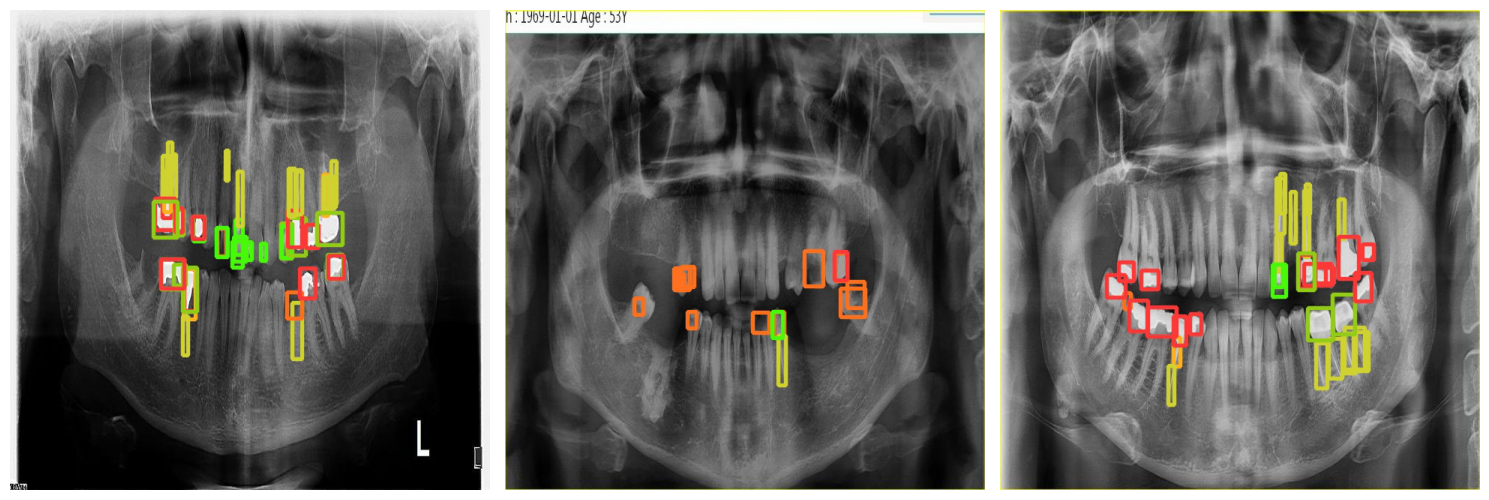

In [81]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to the test result folder
test_folder = "/content/yolov5/runs/detect/exp2"  # Replace with the path to your test folder

# Get the file names of the test images
image_files = os.listdir(test_folder)[:6]  # Replace 5 with the desired number of images

# Create a grid layout for displaying the images
fig, axes = plt.subplots(1, 3, figsize=(15, 13))

# Loop through the image files and plot them
for i, ax in enumerate(axes):
    # Open and display each image
    img = Image.open(os.path.join(test_folder, image_files[i]))
    ax.imshow(img)
    ax.axis('off')

# Adjust the spacing and layout
plt.tight_layout()

# Display the test images
plt.show()


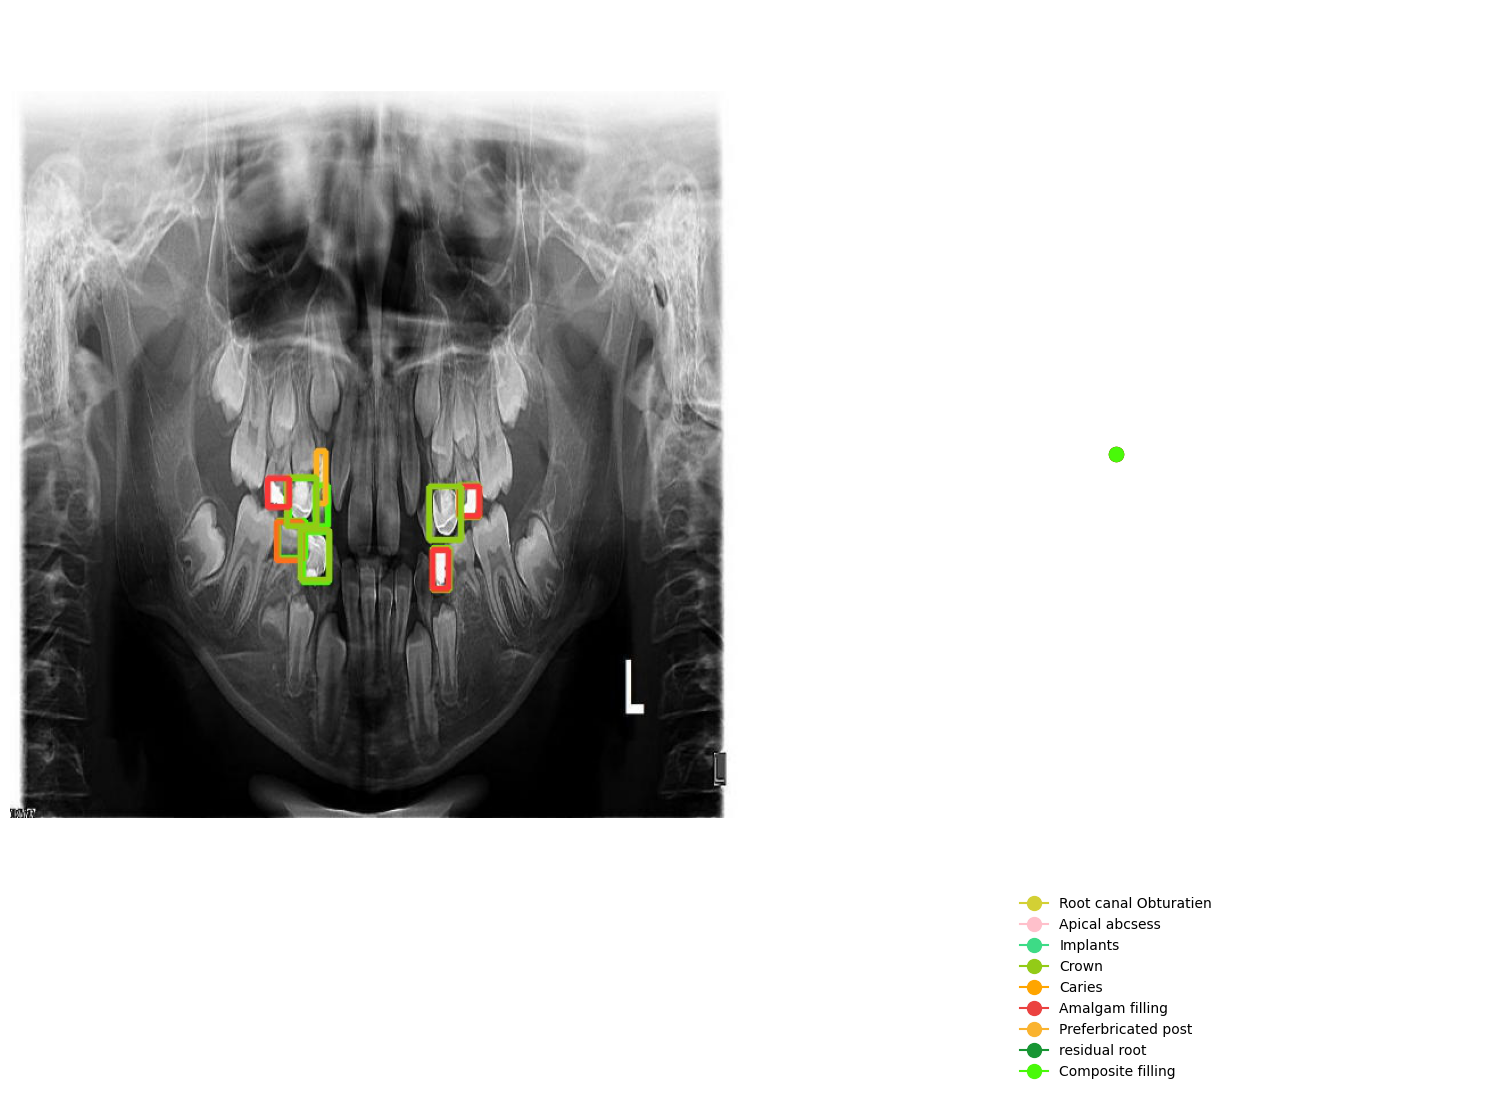

In [82]:
# Path to the test folder
test_folder = "/content/yolov5/runs/detect/exp2"  # Replace with the path to your test folder

# Get the file name of the test image
image_file = os.listdir(test_folder)[60]  # Replace 0 with the index of the desired test image

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 11))

# Plot the test image
img = Image.open(os.path.join(test_folder, image_file))
axes[0].imshow(img)
axes[0].axis('off')

# Define the colors and their corresponding labels
colors = ['#D3D034', 'pink', '#3ddb86', '#93cb17', 'orange','#EB4240','#FAB32F','#179533','#49f909']
labels = ['Root canal Obturatien', 'Apical abcsess', 'Implants', 'Crown', 'Caries','Amalgam filling','Preferbricated post','residual root','Composite filling']

# Plot the color index
for color, label in zip(colors, labels):
    axes[1].plot(0, 0, marker='o', markersize=10, color=color, label=label)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_frame_on(False)
axes[1].legend(frameon=False, loc='center', bbox_to_anchor=(0.5, -0.1))

# Adjust the layout
plt.tight_layout()

# Display the test image and the color index
plt.show()


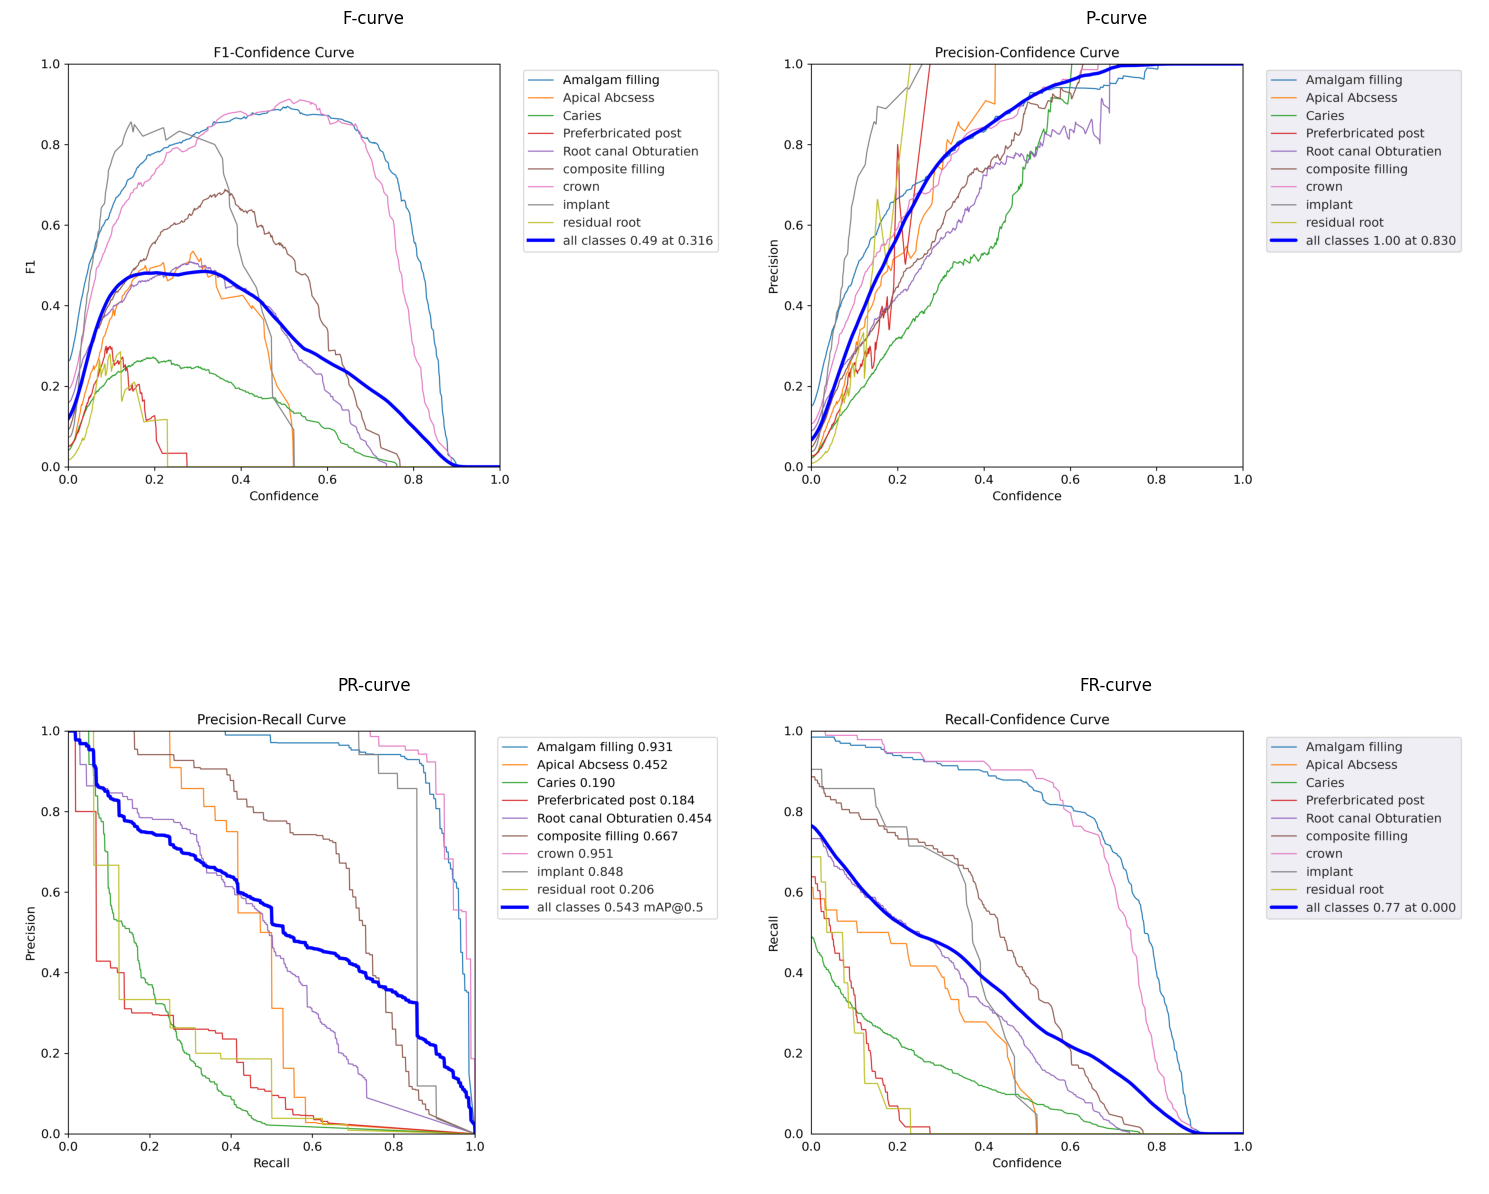

In [83]:

# Path to the graph images (replace with your image paths)
f1_curve_path = "/content/yolov5/runs/train/exp3/F1_curve.png"
p_curve_path = "/content/yolov5/runs/train/exp3/P_curve.png"
pr_curve_path = "/content/yolov5/runs/train/exp3/PR_curve.png"
r_curve_path = "/content/yolov5/runs/train/exp3/R_curve.png"

# Load the graph images
f_curve = Image.open(f1_curve_path)
p_curve = Image.open(p_curve_path)
pr_curve = Image.open(pr_curve_path)
fr_curve = Image.open(r_curve_path)

# Create a figure and arrange the images
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes[0, 0].imshow(f_curve)
axes[0, 0].set_title("F-curve")
axes[0, 0].axis("off")

axes[0, 1].imshow(p_curve)
axes[0, 1].set_title("P-curve")
axes[0, 1].axis("off")

axes[1, 0].imshow(pr_curve)
axes[1, 0].set_title("PR-curve")
axes[1, 0].axis("off")

axes[1, 1].imshow(fr_curve)
axes[1, 1].set_title("FR-curve")
axes[1, 1].axis("off")

# Adjust spacing and layout
plt.tight_layout()

# Display the graph images
plt.show()


In [72]:
import shutil
import os
from zipfile import ZipFile
from google.colab import files

# Define the path to the folder you want to download
folder_path = '/content/yolov5/runs/detect/exp'

# Define the path for the output zip file
output_zip_path = '/content/run.zip'

# Create a zip archive of the folder
shutil.make_archive('/content/run', 'zip', folder_path)

# Download the zip file
files.download(output_zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

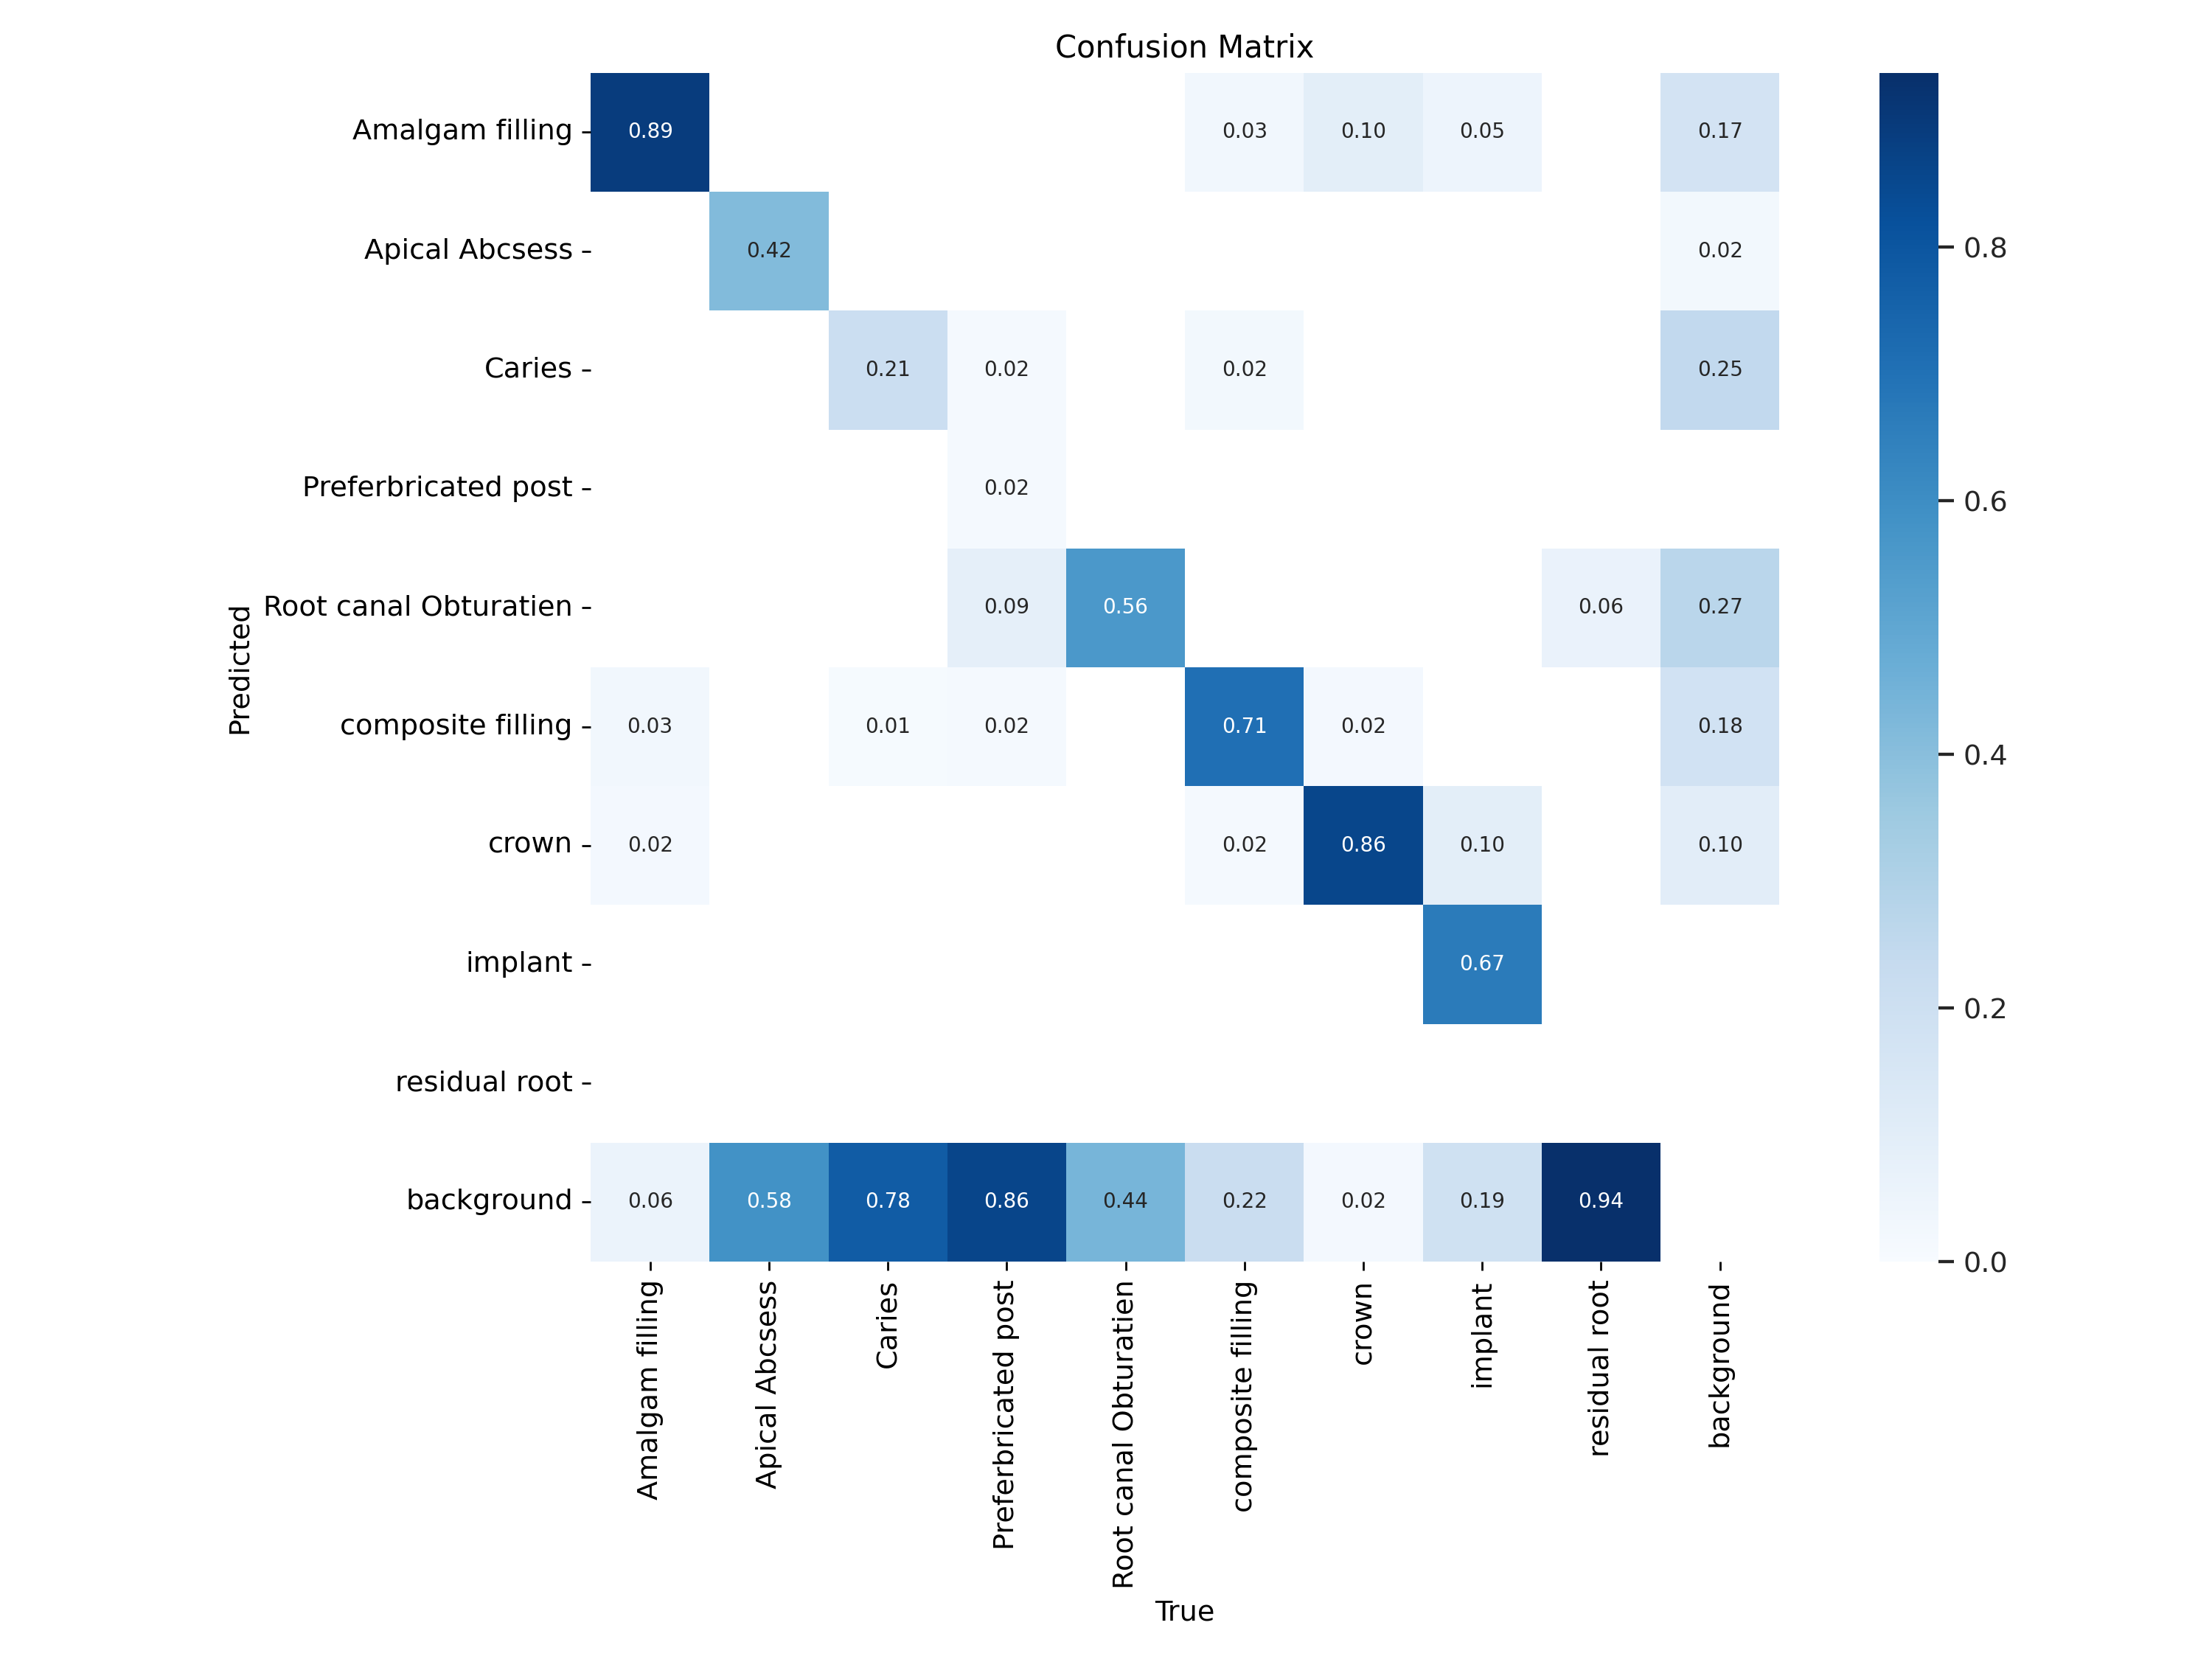

In [78]:
from IPython.display import Image, display
display(Image('/content/yolov5/runs/train/exp3/confusion_matrix.png',width=1200, height=950))

In [73]:
from google.colab import files

# Define the path to the weights file
weights_path = '/content/yolov5/runs/train/exp3/weights/best.pt'

# Download the weights file
files.download(weights_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>